
## Employees Salary Compensation Prediction Model

### 1) Project Objective
- Project objective is to develop a compensation prediction model using regression algorithms and find out which regression model fits well for the dataset.


### 2) Data Collection
- Dataset Source - https://data.world/data-society/employee-compensation-in-sf  (Note: First login to dataworld to access dataset)
- The data consists of 22 column and 291825 rows.

### 3) Dataset information
- Year Type - Fiscal (July through June) or Calendar (January through December)
- Year - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012
- Organization Group Code - A single-digit identifier indicating City departments
- Organization Group - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff
- Department Code - A three-letter identifier indicating the City department in which the employee was employed
- Department - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department
- Union Code - A three-digit identifier representing employees in collective bargaining agreements
- Union - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
- Job Family Code - A four-digit identifier for identifying Family job
- Job Family - Job Family combines similar Jobs into meaningful groups
- Job Code - A four-digit identifier for identifying the job employee is doing
- Job - Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.
- Employee Identifier - Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the Employee Compensation report hosted on openbook.sfgov.org, but that report does show one row for each employee. Employee ID has been included here to allow users to reconstruct the original report. Note that each employee’s identifier will change each time this dataset is updated, so comparisons by employee across multiple versions of the dataset are not possible.
- Salaries - Normal salaries paid to the city employee
- Overtime - Amounts paid to the city employees working in excess of 40 hours per week
- Other Salaries - Various irregular payments made to City employee including premium pay, incentive pay, or other one-time payments
- Total Salary - The sum of all salaries paid to City employees
- Retirement - City contributions to employee retirement plan
- Health and Dental - City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
- Other Benefits - Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.
- Total Benefits - The sum of all benefits paid to the city employees
- Total Compensation - The sum of all salaries and benefits paid to the employees

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Employee_Compensation_SF.csv")
df.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


## Explore Dataset

In [7]:
df.shape

(291825, 22)

In [9]:
df.columns

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291825 entries, 0 to 291824
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year Type                291825 non-null  object 
 1   Year                     291825 non-null  int64  
 2   Organization Group Code  291825 non-null  int64  
 3   Organization Group       291825 non-null  object 
 4   Department Code          291825 non-null  object 
 5   Department               291825 non-null  object 
 6   Union Code               291782 non-null  float64
 7   Union                    291782 non-null  object 
 8   Job Family Code          291780 non-null  object 
 9   Job Family               291780 non-null  object 
 10  Job Code                 291825 non-null  object 
 11  Job                      291825 non-null  object 
 12  Employee Identifier      291825 non-null  int64  
 13  Salaries                 291825 non-null  float64
 14  Over

In [13]:
df.isna().sum()

Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                 43
Union                      43
Job Family Code            45
Job Family                 45
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64

In [15]:
df.nunique()

Year Type                       2
Year                            4
Organization Group Code         7
Organization Group              7
Department Code                54
Department                     54
Union Code                     69
Union                          73
Job Family Code                56
Job Family                     55
Job Code                     1133
Job                          1139
Employee Identifier         52059
Salaries                   214513
Overtime                   108176
Other Salaries             147465
Total Salary               265962
Retirement                 200963
Health/Dental               92759
Other Benefits             243798
Total Benefits             275671
Total Compensation         284433
dtype: int64

In [17]:
df.groupby("Year Type").size()

Year Type
Calendar    124316
Fiscal      167509
dtype: int64

In [19]:
emp_count = df.groupby(["Organization Group","Year Type"]).size()
emp_count

Organization Group                        Year Type
Community Health                          Calendar     27166
                                          Fiscal       36345
Culture & Recreation                      Calendar     11062
                                          Fiscal       15530
General Administration & Finance          Calendar     11196
                                          Fiscal       15155
General City Responsibilities             Calendar       125
                                          Fiscal         175
Human Welfare & Neighborhood Development  Calendar     11641
                                          Fiscal       15348
Public Protection                         Calendar     23590
                                          Fiscal       31973
Public Works, Transportation & Commerce   Calendar     39536
                                          Fiscal       52983
dtype: int64

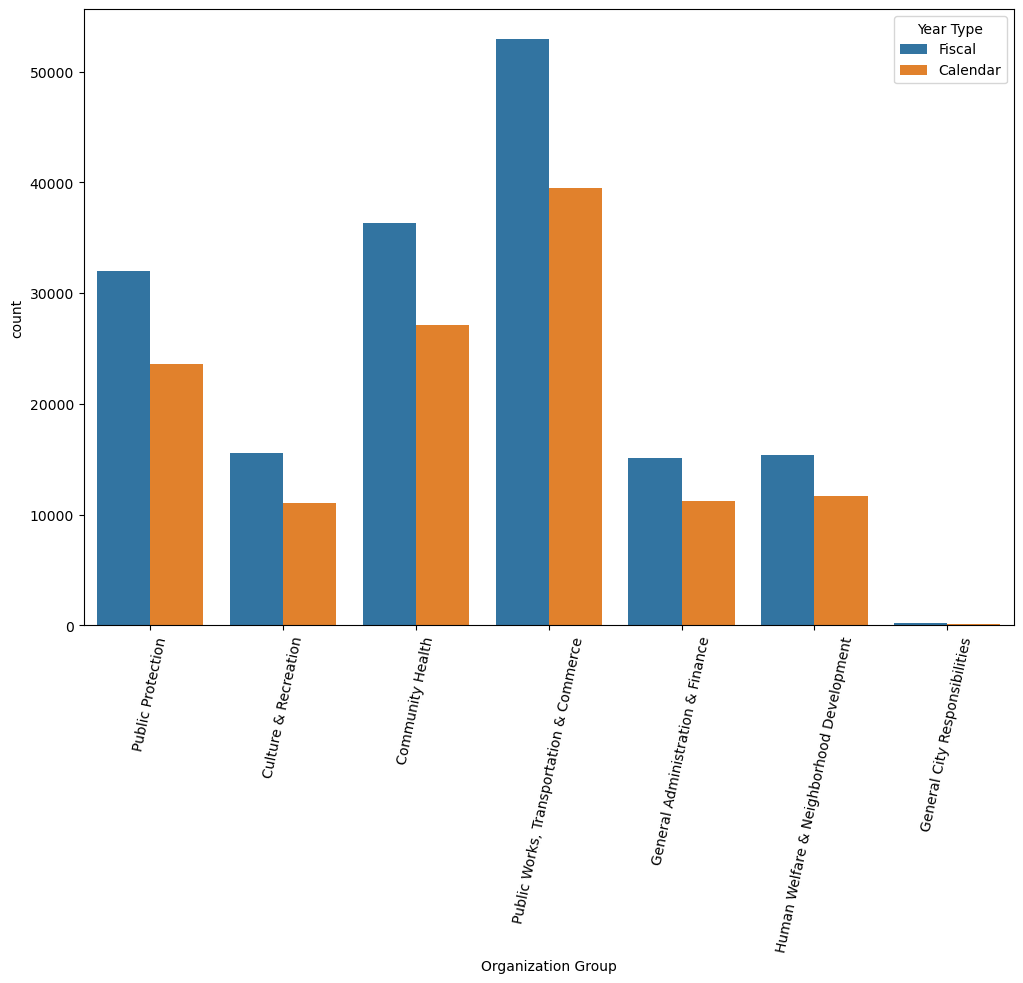

In [21]:
plt.figure(figsize = (12,8))
sns.countplot (x = "Organization Group" , hue = "Year Type", data = df)
plt.xticks(rotation = 78)
plt.show()

In [23]:
df_fiscal = df[df["Year Type"] == "Fiscal"]

In [25]:
df_fiscal.shape

(167509, 22)

In [27]:
df_fiscal = df_fiscal.drop(["Year Type","Employee Identifier"],axis=1)

In [29]:
og_gcr = df_fiscal.loc[df_fiscal["Organization Group"].isin(["General City Responsibilities"])]
og_gcr

,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
2119,2013,7,General City Responsibilities,UNA,General Fund Unallocated,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,5602.39,0.00,0.00,5602.39,1440.37,1141.51,261.92,2843.80,8446.19
3324,2016,7,General City Responsibilities,UNA,General Fund Unallocated,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3284,Recreation Director,0.00,0.00,3302.81,3302.81,0.00,0.00,252.66,252.66,3555.47
5127,2015,7,General City Responsibilities,UNA,General Fund Unallocated,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3280,Assistant Recreation Director,1786.20,0.00,0.00,1786.20,308.49,0.00,141.11,449.60,2235.80
7378,2013,7,General City Responsibilities,UNA,General Fund Unallocated,2.0,Management Unrepresented Employees,0900,Management,0904,Mayoral Staff XVI,28186.14,0.00,0.00,28186.14,4991.76,2954.26,1956.35,9902.37,38088.51
10626,2013,7,General City Responsibilities,UNA,General Fund Unallocated,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.00,0.00,598.82,598.82,0.00,0.00,47.29,47.29,646.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281791,2013,7,General City Responsibilities,UNA,General Fund Unallocated,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,0.00,0.00,63.47,63.47,0.00,0.00,4.86,4.86,68.33
285687,2013,7,General City Responsibilities,UNA,General Fund Unallocated,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,15256.22,2573.09,159.93,17989.24,3945.68,3180.81,1406.15,8532.64,26521.88
288357,2013,7,General City Responsibilities,UNA,General Fund Unallocated,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,10200.74,1535.91,386.76,12123.41,2443.98,3009.10,932.93,6386.01,18509.42
288589,2013,7,General City Responsibilities,UNA,General Fund Unallocated,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,21204.51,963.66,1288.93,23457.10,5774.17,4420.98,1846.11,12041.26,35498.36


In [31]:
df_fiscal = df_fiscal.loc[(df_fiscal["Organization Group"] != "General City Responsibilities")]

In [33]:
df_fiscal.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 167334 entries, 0 to 291821
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     167334 non-null  int64  
 1   Organization Group Code  167334 non-null  int64  
 2   Organization Group       167334 non-null  object 
 3   Department Code          167334 non-null  object 
 4   Department               167334 non-null  object 
 5   Union Code               167291 non-null  float64
 6   Union                    167291 non-null  object 
 7   Job Family Code          167289 non-null  object 
 8   Job Family               167289 non-null  object 
 9   Job Code                 167334 non-null  object 
 10  Job                      167334 non-null  object 
 11  Salaries                 167334 non-null  float64
 12  Overtime                 167334 non-null  float64
 13  Other Salaries           167334 non-null  float64
 14  Total Sal

In [35]:
df_fiscal.nunique()

Year                            4
Organization Group Code         6
Organization Group              6
Department Code                53
Department                     53
Union Code                     69
Union                          73
Job Family Code                56
Job Family                     55
Job Code                     1132
Job                          1138
Salaries                   127061
Overtime                    65743
Other Salaries              90205
Total Salary               155349
Retirement                 117507
Health/Dental               54467
Other Benefits             149693
Total Benefits             160666
Total Compensation         163986
dtype: int64

In [37]:
print("Duplicated data:", df_fiscal.duplicated().sum())

Duplicated data: 2003


### Summary 

When exploring data, we observed that there are 2 different 'Year Type'- Calender and Fiscal. Hence comparing data we can see there is no variance between the two year type. So we consider Fiscal year due to forecasting and dropping the calendar year.

Besides that, in column 'Organization Group' the value 'General City Responsibilities' is found out to be less in number so we decided to remove them and dropped unwanted columns such as 'Employee Identifier' and 'Year Type'.

Also we found out there are duplicate values and null values in four different columns.

### Data Cleaning

In [39]:
df_fiscal.drop_duplicates(keep = "last")

,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
3,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,2202,Dental Aide,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64
5,2013,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",45321.18,0.00,0.00,45321.18,9386.03,11780.60,3486.34,24652.97,69974.15
6,2015,5,Culture & Recreation,LIB,Public Library,790.0,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,28305.50,0.00,1193.14,29498.64,6616.52,5793.48,2430.74,14840.74,44339.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291816,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1823,Senior Administrative Analyst,25941.30,0.00,0.00,25941.30,5818.66,3687.91,2122.81,11629.38,37570.68
291817,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,752.00,0.00,8.96,760.96,0.00,293.04,59.06,352.10,1113.06
291818,2013,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2400,"Lab, Pharmacy & Med Techs",2430,Medical Evaluations Assistant,56974.00,1811.10,1524.48,60309.58,10607.05,12801.79,4921.72,28330.56,88640.14
291819,2016,1,Public Protection,FIR,Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,114900.88,93181.73,18206.93,226289.54,22716.48,16011.78,3823.00,42551.26,268840.80


In [41]:
df_fiscal = df_fiscal.dropna(subset = ["Union Code","Union","Job Family Code","Job Family"])

In [43]:
df_fiscal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167289 entries, 0 to 291821
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     167289 non-null  int64  
 1   Organization Group Code  167289 non-null  int64  
 2   Organization Group       167289 non-null  object 
 3   Department Code          167289 non-null  object 
 4   Department               167289 non-null  object 
 5   Union Code               167289 non-null  float64
 6   Union                    167289 non-null  object 
 7   Job Family Code          167289 non-null  object 
 8   Job Family               167289 non-null  object 
 9   Job Code                 167289 non-null  object 
 10  Job                      167289 non-null  object 
 11  Salaries                 167289 non-null  float64
 12  Overtime                 167289 non-null  float64
 13  Other Salaries           167289 non-null  float64
 14  Total Sal

In [45]:
df_fiscal["Union Code"] = df_fiscal["Union Code"].astype(int)

In [47]:
df_fiscal.shape

(167289, 20)

In [49]:
df_fiscal.isnull().sum()

Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

#### Data cleaning is done: 
- Drop missing value from Union, Union Code, Job Family Code, Job Family.

### Descriptive Analysis

In [51]:
numerical = df_fiscal.select_dtypes(include = ["float"])
categorical = ["Organization Group","Job Family","Union","Job","Department"]

In [53]:
# Checking Outliers
for feature in numerical:
    
    Q1 = df_fiscal[feature].quantile(0.25)
    Q3 = df_fiscal[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df_fiscal[(df_fiscal[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Salaries yes
Overtime yes
Other Salaries yes
Total Salary yes
Retirement yes
Health/Dental no
Other Benefits yes
Total Benefits yes
Total Compensation yes


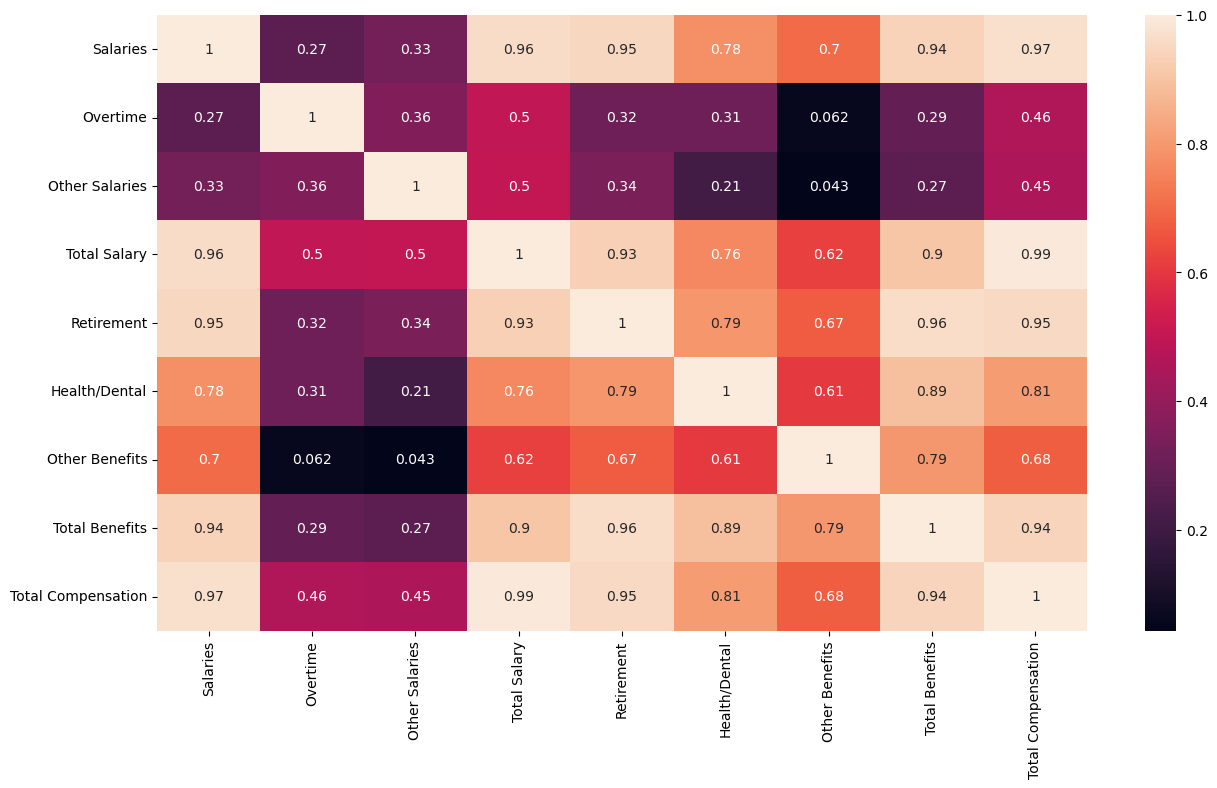

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(numerical.corr(), annot=True)
plt.show()

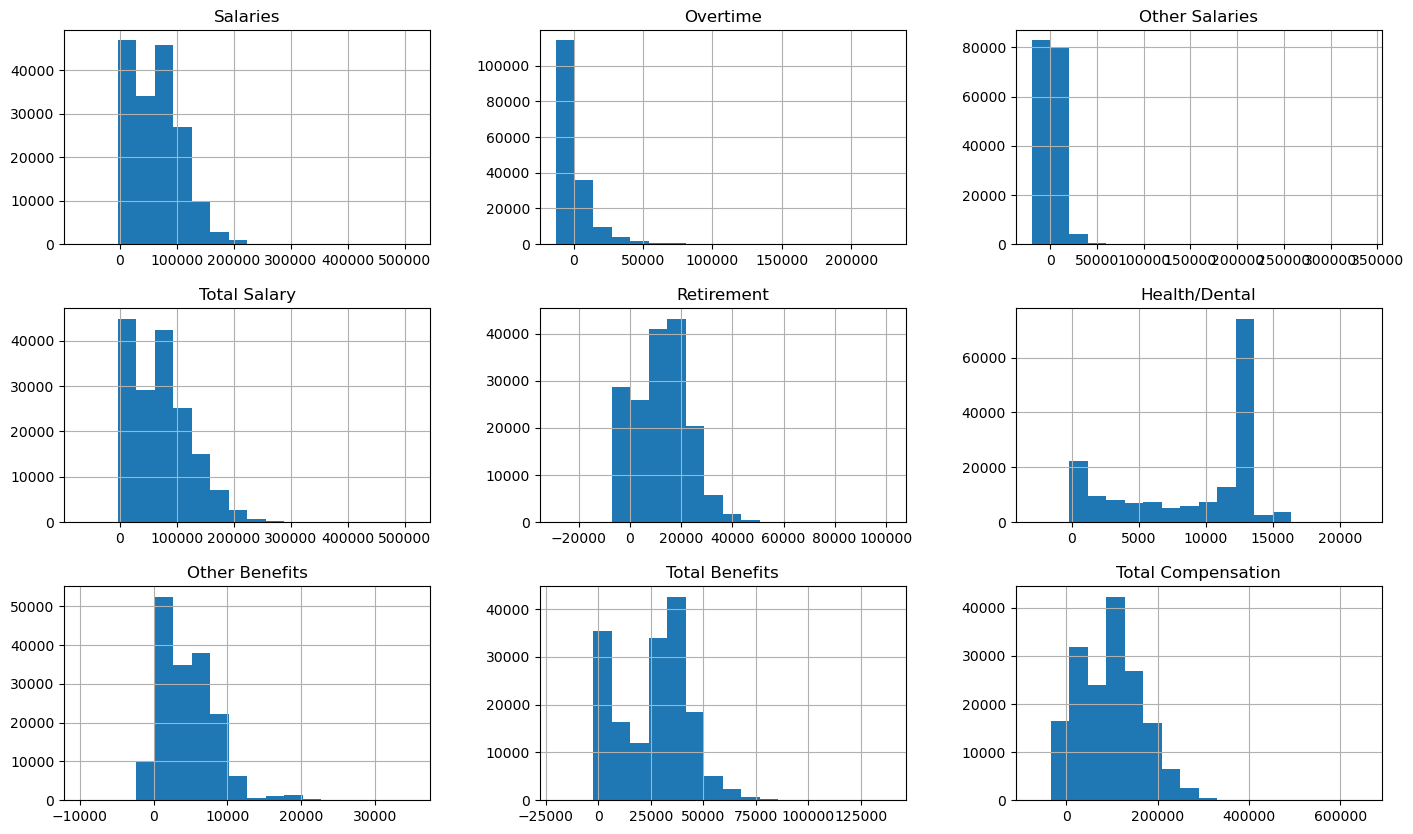

In [57]:
df_fiscal[numerical.columns].hist(bins=18, figsize=(17, 10), layout=(3, 3))
plt.show()

In [59]:
numerical.describe()

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,167289.000000,167289.000000,167289.000000,167289.000000,167289.000000,167289.000000,167289.000000,167289.000000,167289.000000
mean,63001.254584,4419.662612,3751.833061,71172.750256,12747.885241,8897.440065,4637.523001,26282.848308,97455.598564
std,44778.557921,11103.099279,7636.018951,52366.861473,9733.212892,4919.060051,3810.843882,16790.456495,67914.678015
min,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-28723.190000,-2940.470000,-9857.740000,-19814.440000,-74082.610000
25%,22719.400000,0.000000,0.000000,24675.180000,3212.400000,4214.930000,1552.210000,9183.600000,34865.550000
50%,62615.710000,0.000000,678.650000,67841.270000,13001.960000,11985.200000,4341.210000,30140.200000,97763.290000
75%,92565.580000,2784.730000,4554.180000,103018.680000,19354.410000,12777.170000,6837.620000,38428.070000,141755.920000
max,515101.800000,227313.620000,336726.340000,515101.800000,101306.010000,21872.800000,35157.630000,138396.350000,653498.150000


In [61]:
df_fiscal.describe(include=['O'])

,Organization Group,Department Code,Department,Union,Job Family Code,Job Family,Job Code,Job
count,167289,167289,167289,167289,167289,167289,167289,167289
unique,6,53,53,72,56,55,1129,1135
top,"Public Works, Transportation & Commerce",DPH,Public Health,"SEIU - Miscellaneous, Local 1021",2300,Nursing,9163,Transit Operator
freq,52965,36345,36345,47496,17322,17322,10215,10215


In [63]:
df_neg = numerical[~((numerical.loc[:,:] >= 0).all(1))]
df_neg

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
340,7785.26,0.0,1400.55,9185.81,7580.46,672.25,-0.02,8252.69,17438.50
811,-6622.50,0.0,28767.03,22144.53,-999.33,1230.94,308.89,540.50,22685.03
901,79074.00,0.0,1674.89,80748.89,15244.08,8862.78,-1228.46,22878.40,103627.29
1401,907.35,0.0,0.00,907.35,-0.02,0.00,0.00,-0.02,907.33
1465,0.00,0.0,0.00,0.00,-33.89,0.00,0.00,-33.89,-33.89
...,...,...,...,...,...,...,...,...,...
288216,0.00,0.0,0.00,0.00,-39.31,0.00,0.00,-39.31,-39.31
288543,0.00,0.0,32957.35,32957.35,65.06,-193.95,1499.97,1371.08,34328.43
290389,0.00,0.0,512.66,512.66,0.00,-193.95,39.40,-154.55,358.11
290685,2425.35,0.0,80.85,2506.20,-1461.11,215.74,1054.38,-190.99,2315.21


In [65]:
emp_comp_negative = df_neg[(df_neg[["Total Compensation"]] < 0).all(1)]
emp_comp_negative

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
1465,0.0,0.0,0.00,0.00,-33.89,0.00,0.00,-33.89,-33.89
1951,0.0,0.0,0.00,0.00,0.00,0.00,-6.63,-6.63,-6.63
7476,0.0,0.0,-2210.21,-2210.21,0.00,0.00,-169.08,-169.08,-2379.29
10227,0.0,0.0,0.00,0.00,0.00,0.00,-1.19,-1.19,-1.19
11205,0.0,0.0,0.00,0.00,-45.55,0.00,0.00,-45.55,-45.55
...,...,...,...,...,...,...,...,...,...
283000,0.0,0.0,0.00,0.00,0.00,0.00,-3.96,-3.96,-3.96
284275,0.0,0.0,0.00,0.00,0.00,0.00,-29.02,-29.02,-29.02
285516,-2997.0,0.0,0.00,-2997.00,0.00,-479.41,-232.03,-711.44,-3708.44
287603,0.0,0.0,0.00,0.00,0.00,0.00,-3.96,-3.96,-3.96


In [67]:
df_final = df_fiscal[~(df_fiscal["Total Compensation"] <= 0)]
df_final

,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,Public Protection,DAT,District Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
3,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,2202,Dental Aide,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64
5,2013,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",45321.18,0.00,0.00,45321.18,9386.03,11780.60,3486.34,24652.97,69974.15
6,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,28305.50,0.00,1193.14,29498.64,6616.52,5793.48,2430.74,14840.74,44339.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291816,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1823,Senior Administrative Analyst,25941.30,0.00,0.00,25941.30,5818.66,3687.91,2122.81,11629.38,37570.68
291817,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,752.00,0.00,8.96,760.96,0.00,293.04,59.06,352.10,1113.06
291818,2013,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2400,"Lab, Pharmacy & Med Techs",2430,Medical Evaluations Assistant,56974.00,1811.10,1524.48,60309.58,10607.05,12801.79,4921.72,28330.56,88640.14
291819,2016,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,114900.88,93181.73,18206.93,226289.54,22716.48,16011.78,3823.00,42551.26,268840.80


In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167101 entries, 0 to 291821
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     167101 non-null  int64  
 1   Organization Group Code  167101 non-null  int64  
 2   Organization Group       167101 non-null  object 
 3   Department Code          167101 non-null  object 
 4   Department               167101 non-null  object 
 5   Union Code               167101 non-null  int32  
 6   Union                    167101 non-null  object 
 7   Job Family Code          167101 non-null  object 
 8   Job Family               167101 non-null  object 
 9   Job Code                 167101 non-null  object 
 10  Job                      167101 non-null  object 
 11  Salaries                 167101 non-null  float64
 12  Overtime                 167101 non-null  float64
 13  Other Salaries           167101 non-null  float64
 14  Total Sal

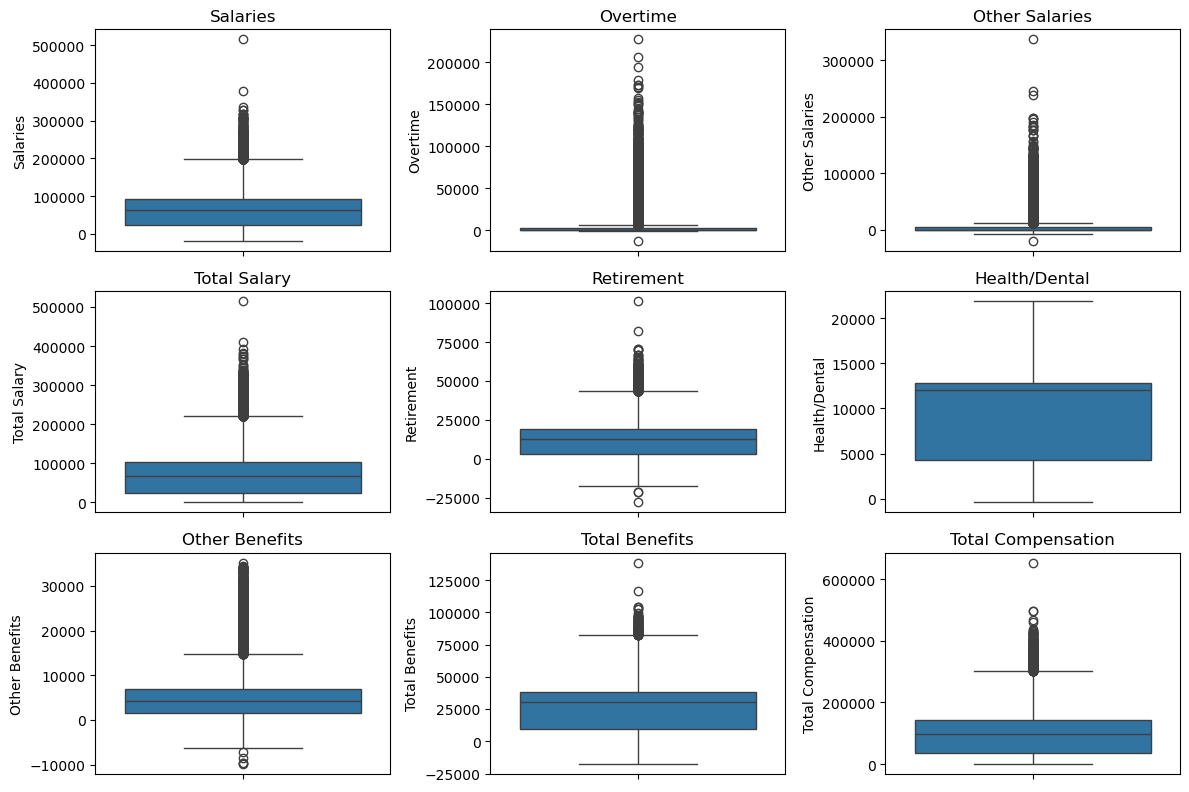

In [71]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_final.select_dtypes(include = ["float"]),1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_final[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [73]:
max_threshold = df_final['Salaries'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df_final['Salaries'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 184181.44
Min_threshold: 0.0


In [75]:
df1 = df_final[(df_final['Salaries']<max_threshold) & (df_final['Salaries']>min_threshold)]
df1.shape

(163086, 20)

In [77]:
max_threshold = df1['Overtime'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df1['Overtime'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 56077.93649999999
Min_threshold: 0.0


In [79]:
df2 = df1[(df1['Overtime']<max_threshold) & (df1['Overtime']>min_threshold)]
df2.shape

(69074, 20)

In [81]:
max_threshold = df2['Other Salaries'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df2['Other Salaries'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 30518.212100000073
Min_threshold: 0.0


In [83]:
df3 = df2[(df2['Other Benefits']<max_threshold) & (df2['Other Benefits']>min_threshold)]
df3.shape

(69049, 20)

In [85]:
max_threshold = df3['Total Salary'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df3['Total Salary'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 195650.86400000018
Min_threshold: 1969.8912000000003


In [87]:
df4 = df3[(df3['Total Salary']<max_threshold) & (df3['Total Salary']>min_threshold)]
df4.shape

(67667, 20)

In [89]:
max_threshold = df4['Retirement'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df4['Retirement'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 32036.90359999999
Min_threshold: 0.0


In [91]:
df5 = df4[(df4['Retirement']<max_threshold) & (df4['Retirement']>min_threshold)]
df5.shape

(63856, 20)

In [93]:
max_threshold = df5['Other Benefits'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df5['Other Benefits'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 10606.066999999997
Min_threshold: 294.531


In [95]:
df6 = df5[(df5['Other Benefits']<max_threshold) & (df5['Other Benefits']>min_threshold)]
df6.shape

(62578, 20)

In [97]:
max_threshold = df6['Total Benefits'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df6['Total Benefits'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 48491.2014
Min_threshold: 4357.5353000000005


In [99]:
df7 = df6[(df6['Total Benefits']<max_threshold) & (df6['Total Benefits']>min_threshold)]
df7.shape

(61326, 20)

In [101]:
max_threshold = df7['Total Compensation'].quantile(0.99)
print('Max_threshold:',max_threshold)
min_threshold = df7['Total Compensation'].quantile(0.01)
print('Min_threshold:',min_threshold)

Max_threshold: 225006.0325
Min_threshold: 19872.2425


In [103]:
df8 = df7[(df7['Total Compensation']<max_threshold) & (df7['Total Compensation']>min_threshold)]
df8.shape

(60098, 20)

In [105]:
df8.nunique()

Year                           4
Organization Group Code        6
Organization Group             6
Department Code               39
Department                    39
Union Code                    47
Union                         49
Job Family Code               54
Job Family                    54
Job Code                     630
Job                          632
Salaries                   46278
Overtime                   56760
Other Salaries             50797
Total Salary               59901
Retirement                 53598
Health/Dental              25266
Other Benefits             57958
Total Benefits             59411
Total Compensation         59937
dtype: int64

In [107]:
df8.describe()

,Year,Organization Group Code,Union Code,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000,60098.000000
mean,2014.552132,2.373141,492.056375,73377.359616,8904.982509,5695.464777,87977.806902,15830.565828,11492.439966,4956.151026,32279.156821,120256.963723
std,1.122549,1.376539,319.704084,28867.019296,10556.114333,6133.714606,37527.829342,6138.218150,2820.268299,2530.987546,9151.858331,45270.788436
min,2013.000000,1.000000,1.000000,2046.590000,0.020000,-19131.100000,9260.120000,0.010000,0.000000,294.630000,4430.310000,19877.860000
25%,2014.000000,1.000000,250.000000,55248.892500,1245.117500,1077.920000,61670.825000,11735.775000,11223.000000,2563.592500,28372.965000,90058.432500
50%,2015.000000,2.000000,498.000000,68228.800000,4672.575000,3542.140000,82440.495000,15741.460000,12512.405000,5043.165000,33893.855000,116902.690000
75%,2016.000000,4.000000,790.000000,93214.495000,12837.580000,8546.672500,113636.907500,20139.432500,12924.880000,6772.735000,38880.512500,152835.655000
max,2016.000000,6.000000,969.000000,173870.240000,56076.070000,93934.310000,191882.140000,32016.350000,16161.430000,10605.680000,48491.160000,224997.280000


### Summary
- We found out some outliers are present in the data and it is removed using percentile method.
- There was also some values are in negative especially in target variables, we also removed it.

### Data Insights and Visualization

In [109]:
yearly_trend = df8.pivot_table(values= ["Total Compensation"], index=df8["Year"], columns=df8["Organization Group"], aggfunc=np.median)

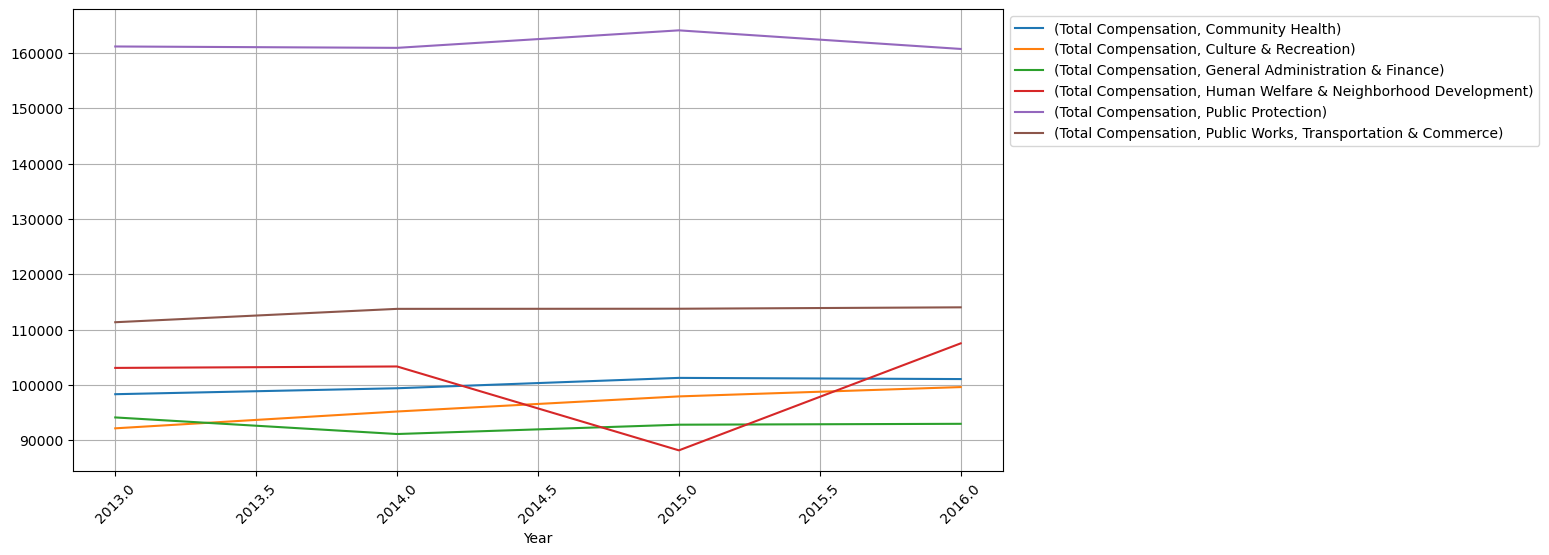

In [111]:
yearly_trend.plot(figsize=(12,6), grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

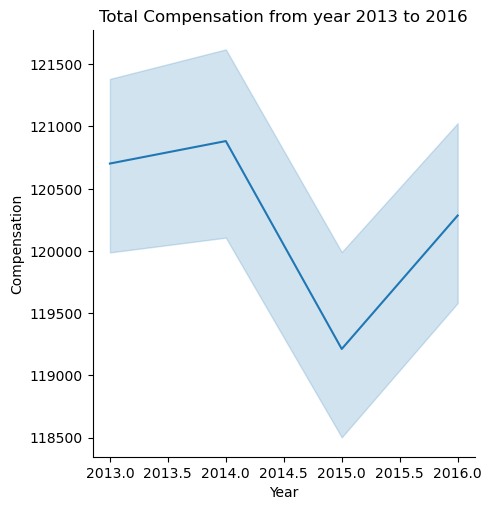

In [127]:
sns.relplot(x = "Year", y = "Total Compensation", data = df8, kind='line')
plt.ylabel("Compensation")
plt.title("Total Compensation from year 2013 to 2016")
plt.show()

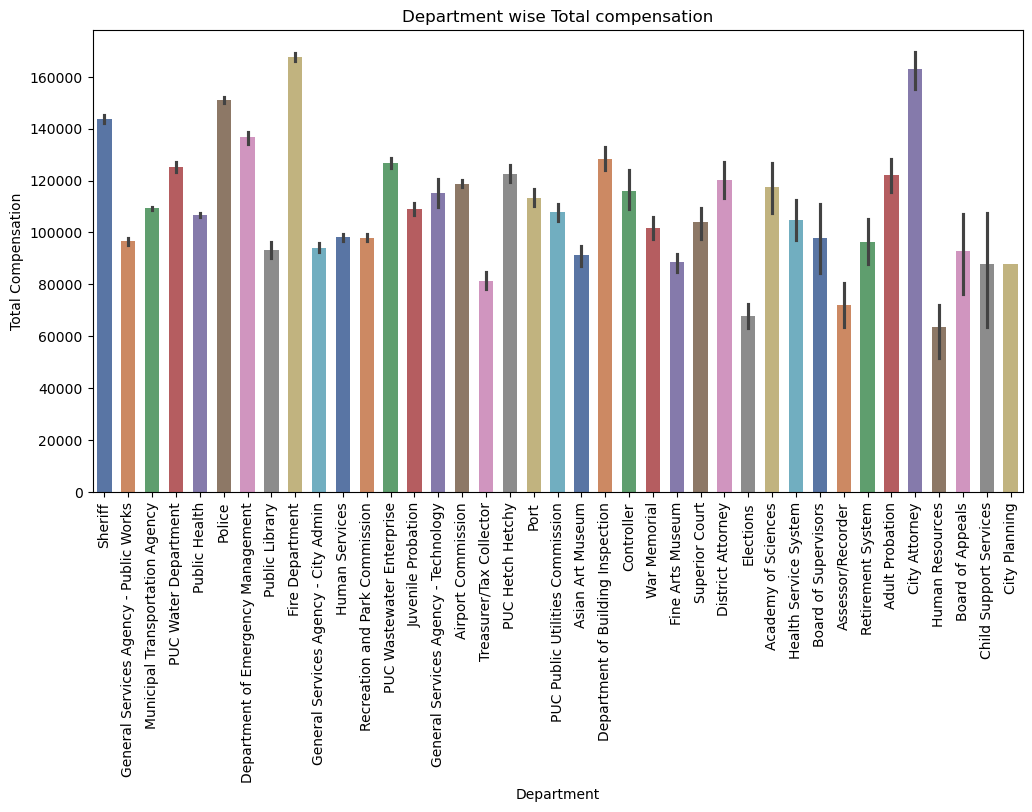

In [141]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x="Department", y="Total Compensation", data=df8, width=0.6, palette= 'deep')
plt.title('Department wise Total compensation')
plt.show()

### Data Preprocessing

In [143]:
df_emp_final = df8.copy()

In [145]:
df_emp_final.nunique()

Year                           4
Organization Group Code        6
Organization Group             6
Department Code               39
Department                    39
Union Code                    47
Union                         49
Job Family Code               54
Job Family                    54
Job Code                     630
Job                          632
Salaries                   46278
Overtime                   56760
Other Salaries             50797
Total Salary               59901
Retirement                 53598
Health/Dental              25266
Other Benefits             57958
Total Benefits             59411
Total Compensation         59937
dtype: int64

In [147]:
df_emp_final = df_emp_final.drop(["Organization Group Code","Job Family Code","Job Code","Department Code","Union Code","Union",
                       "Job","Total Salary","Total Benefits"],axis=1)

In [149]:
df_emp_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60098 entries, 9 to 291818
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                60098 non-null  int64  
 1   Organization Group  60098 non-null  object 
 2   Department          60098 non-null  object 
 3   Job Family          60098 non-null  object 
 4   Salaries            60098 non-null  float64
 5   Overtime            60098 non-null  float64
 6   Other Salaries      60098 non-null  float64
 7   Retirement          60098 non-null  float64
 8   Health/Dental       60098 non-null  float64
 9   Other Benefits      60098 non-null  float64
 10  Total Compensation  60098 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.5+ MB


In [151]:
df_emp_final.reset_index()

,index,Year,Organization Group,Department,Job Family,Salaries,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Compensation
0,9,2014,Public Protection,Sheriff,Correction & Detention,89101.22,6856.77,5563.78,17596.33,12512.55,1627.91,133258.56
1,11,2013,"Public Works, Transportation & Commerce",General Services Agency - Public Works,Public Safety Inspection,57467.12,355.65,0.00,11901.38,11933.98,4691.34,86349.47
2,13,2013,"Public Works, Transportation & Commerce",Municipal Transportation Agency,Street Transit,64170.89,13128.97,2677.81,17109.68,13379.17,6204.01,116670.53
3,17,2014,"Public Works, Transportation & Commerce",Municipal Transportation Agency,Street Transit,78639.30,20332.03,7821.87,17683.84,12512.54,8707.07,145696.65
4,19,2015,"Public Works, Transportation & Commerce",PUC Water Department,Journeyman Trade,100655.41,8240.09,16911.85,24354.06,12500.56,9962.73,172624.70
...,...,...,...,...,...,...,...,...,...,...,...,...
60093,291802,2013,"Public Works, Transportation & Commerce",Municipal Transportation Agency,Street Transit,61928.52,20752.59,931.67,16084.20,12911.66,6576.96,119185.60
60094,291808,2016,Public Protection,Police,Police Services,121017.81,30007.31,2457.85,21505.49,13068.80,2632.20,190689.46
60095,291809,2016,Public Protection,Sheriff,Correction & Detention,83962.25,6571.87,7973.73,16349.18,12969.05,1712.11,129538.19
60096,291812,2016,Public Protection,Juvenile Probation,Correction & Detention,66504.10,24918.63,6736.30,17343.32,12931.38,1859.98,130293.71


In [153]:
X = df_emp_final.drop(columns = ["Total Compensation"])

y = df_emp_final["Total Compensation"]

In [155]:
y.dtypes

dtype('float64')

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60098 entries, 9 to 291818
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                60098 non-null  int64  
 1   Organization Group  60098 non-null  object 
 2   Department          60098 non-null  object 
 3   Job Family          60098 non-null  object 
 4   Salaries            60098 non-null  float64
 5   Overtime            60098 non-null  float64
 6   Other Salaries      60098 non-null  float64
 7   Retirement          60098 non-null  float64
 8   Health/Dental       60098 non-null  float64
 9   Other Benefits      60098 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 5.0+ MB


### Encoding Categorical Values

In [159]:
X = pd.get_dummies(X, columns=["Organization Group", "Job Family"])
X.head().T

,9,11,13,17,19
Year,2014,2013,2013,2014,2015
Department,Sheriff,General Services Agency - Public Works,Municipal Transportation Agency,Municipal Transportation Agency,PUC Water Department
Salaries,89101.22,57467.12,64170.89,78639.3,100655.41
Overtime,6856.77,355.65,13128.97,20332.03,8240.09
Other Salaries,5563.78,0.0,2677.81,7821.87,16911.85
...,...,...,...,...,...
Job Family_Semi-Skilled & General Labor,False,False,False,False,False
Job Family_Skilled Labor,False,False,False,False,False
Job Family_Street Transit,False,False,True,True,False
Job Family_Sub-Professional Engineering,False,False,False,False,False


In [161]:
count_dept = X.Department.value_counts()

In [163]:
encode_dept = count_dept/len(X.Department)
X["dept_enc"] = X.Department.map(count_dept)
X.head().T

,9,11,13,17,19
Year,2014,2013,2013,2014,2015
Department,Sheriff,General Services Agency - Public Works,Municipal Transportation Agency,Municipal Transportation Agency,PUC Water Department
Salaries,89101.22,57467.12,64170.89,78639.3,100655.41
Overtime,6856.77,355.65,13128.97,20332.03,8240.09
Other Salaries,5563.78,0.0,2677.81,7821.87,16911.85
...,...,...,...,...,...
Job Family_Skilled Labor,False,False,False,False,False
Job Family_Street Transit,False,False,True,True,False
Job Family_Sub-Professional Engineering,False,False,False,False,False
Job Family_Supervisory-Labor & Trade,False,False,False,False,False


In [165]:
X.drop(["Department"], axis=1, inplace=True)

### Create a Train Test Split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [169]:
sum(y_train)/len(y_train)

120220.86651275012

In [171]:
sum(y_test)/len(y_test)

120401.34655740432

In [173]:
print('X_train:',X_train.shape,'X_test:', X_test.shape,'y_train:', y_train.shape,'y_test:', y_test.shape)

X_train: (48078, 68) X_test: (12020, 68) y_train: (48078,) y_test: (12020,)


In [175]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

### Feature Scaling

In [177]:
sc = StandardScaler()

ss_col = X.columns[1:7]

for item in ss_col:
    X_train_scale[item] = sc.fit_transform(X_train[[item]])
    X_test_scale[item] = sc.fit_transform(X_test[[item]])

In [179]:
X_train_scale.head()

,Year,Salaries,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Organization Group_Community Health,Organization Group_Culture & Recreation,Organization Group_General Administration & Finance,...,Job Family_Recreation,Job Family_Revenue,Job Family_SF Redevelopment Agency,Job Family_SF Superior Court,Job Family_Semi-Skilled & General Labor,Job Family_Skilled Labor,Job Family_Street Transit,Job Family_Sub-Professional Engineering,Job Family_Supervisory-Labor & Trade,dept_enc
256686,2013,-0.401090,-0.826969,-0.294383,-0.670325,0.484240,0.214808,True,False,False,...,False,False,False,False,False,False,False,False,False,10022
5219,2014,1.575209,-0.061351,0.068586,1.386676,0.343585,-1.405598,False,False,False,...,False,False,False,False,False,False,False,False,False,8821
116935,2015,-1.432101,-0.758214,-0.812285,-1.835771,-1.323127,-0.896630,False,True,False,...,False,False,False,False,False,False,False,False,False,278
64279,2015,-0.208073,-0.800911,-0.834159,-0.094172,0.356314,0.280366,False,False,False,...,False,False,False,False,False,False,False,False,False,680
111097,2015,0.816735,0.080623,0.702571,0.997326,0.402950,-1.191319,False,False,False,...,False,False,False,False,False,False,False,False,False,8821


In [181]:
metric_score = pd.DataFrame(columns=["model", "MAE", "MSE", "RMSE", "R2"])

model_test = {"Decision Tree":DecisionTreeRegressor(), "Random Forest Reg":RandomForestRegressor(), "Linear Regression":LinearRegression(),\
              "GradientBoosting Reg":GradientBoostingRegressor(),"XGB Reg":XGBRegressor(),\
              "AdaBoost Reg":AdaBoostRegressor(),"K-Neighbors Reg":KNeighborsRegressor()}

counter = 0
for n, m in model_test.items():
    base_model = m.fit(X_train_scale, y_train)
    y_pred = base_model.predict(X_test_scale)
    metric_score.loc[counter, :] = n, mean_absolute_error(y_test , y_pred), mean_squared_error(y_test, y_pred),\
    np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test,y_pred)

    counter += 1

print(metric_score)

                  model          MAE               MSE          RMSE        R2
0         Decision Tree  2050.120955   10786493.601568   3284.279769  0.994728
1     Random Forest Reg  1181.437535    4564746.102477   2136.526644  0.997769
2     Linear Regression   209.837609      70703.569504    265.901428  0.999965
3  GradientBoosting Reg  1648.283131    5328993.714624   2308.461331  0.997395
4               XGB Reg  1154.177281     3332856.28039   1825.611207  0.998371
5          AdaBoost Reg  9504.819422  117645063.961653  10846.430932    0.9425
6       K-Neighbors Reg  2706.861857   19129441.295961   4373.721676   0.99065


In [183]:
Lr_model = LinearRegression()
Lr_model = Lr_model.fit(X_train_scale, y_train)
y_pred = Lr_model.predict(X_test_scale)

In [187]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
106455,107786.07,107557.226550,228.843450
41859,101078.51,100642.209091,436.300909
89608,131633.40,131321.115612,312.284388
222259,170273.73,170356.453894,-82.723894
235743,122825.86,122562.152041,263.707959
...,...,...,...
280774,155326.80,154990.011586,336.788414
257427,69748.42,69566.612211,181.807789
23646,142719.36,142421.311375,298.048625
40247,101774.90,101674.786794,100.113206


#### Percentage of Total Compensation of the MAPE of the Linear regression

In [193]:
percent_lr = np.mean(np.abs(y_test - y_pred))/np.mean(np.abs(y_test))*100
percent_lr

0.17428177886199384

### Conclusion

- The aim of this project was to create best regression model for the employee salary compensation dataset and to predict the compensation paid. This helps the San Francisco Controller's Office to have better planning of their budget and resources to help prevent under or over estimations and maintain a stable calculation through the years to come.
- During Model Building : Random Forests, XGBoost, AdaBoost, DecisionTree, Linear Regression, Gradient Boosting and K Neighbors were used for machine learning models training and mean absolute error was calculated.
- Result : The best model performance is Linear Regression because it has the lowest average discrepancy between actual and predicted value compared to other models. Linear Regression can forecast the compensation with mean absolute percentage error (MAPE) of 0.17% which are a very good results with a lower error rate.